<a href="https://colab.research.google.com/github/Pedro-hn/GridSearchCV/blob/main/C%C3%B3pia_de_Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px

from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
data = pd.read_csv("california_housing_test.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
data.shape

(3000, 9)

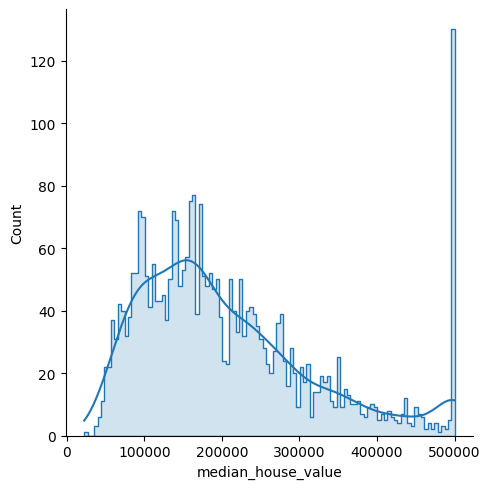

In [ ]:
variavel = data.median_house_value
sns.displot(data,
            x=variavel,
            bins=110,
            alpha=.2,
            kde=True,
            element='step')
plt.show()

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
fig = px.box(data, y='median_house_value')

fig.show()

In [ ]:
data.shape

(3000, 0)

In [ ]:
preco = data.median_house_value > 300000
preco.value_counts()

False    2453
True      547
Name: median_house_value, dtype: int64

In [ ]:
data = data[(data.median_house_value < 300000)]

In [ ]:
data.shape

(155, 9)

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
25,-118.03,34.16,36.0,1401.0,218.0,667.0,225.0,7.1615,484700.0
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0
117,-122.07,37.34,30.0,1851.0,238.0,631.0,236.0,10.1007,500001.0
118,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0
124,-117.81,33.84,17.0,4343.0,515.0,1605.0,484.0,10.5981,460100.0


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,-119.523590,35.681077,28.323133,2488.868625,522.378213,1421.789066,481.598939,3.349468,162381.313749
std,1.989996,2.187968,12.365886,2101.157643,407.209933,1047.482265,354.848832,1.287452,64724.580084
min,-124.180000,32.560000,1.000000,6.000000,2.000000,5.000000,2.000000,0.536000,22500.000000
25%,-121.570000,33.930000,18.000000,1340.000000,287.000000,788.000000,271.000000,2.380500,108400.000000
50%,-118.460000,34.310000,29.000000,2018.000000,431.000000,1184.000000,403.000000,3.195700,158800.000000
75%,-117.970000,37.725000,37.000000,3004.000000,631.000000,1761.500000,593.000000,4.188850,213200.000000
max,-114.490000,41.920000,52.000000,30450.000000,5033.000000,11935.000000,4855.000000,10.226400,299500.000000


In [ ]:
data.shape

(2451, 9)

In [ ]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
X = data.drop("median_house_value", axis=1)
y = data.median_house_value

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size=.3)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
hiper={'max depth': [2,3,4,5],
       }


grid = GridSearchCV(hiper)